<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

I have just been hired by College Spring, a company that offers a SAT preparation program. The company is in the beginning stages of expanding its services. As such, my first assignment is to provide insight on the best course of action for expansion.

*Markdown*
LaTeX $\alpha^{2}$



### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Currently, the College Spring is offering services to private and charter schools in Southern California, San Francisco Bay, and in New York. Company executives have made the decision to offer services to public schools as well. According to its most recent annual report, the company provided preparatory training to 5,500 students, of which a total of 4,400 were located in California. ([*2018-2019 Annual Report*](https://collegespring.org/wp-content/uploads/2019/11/CollegeSpring_Annual_Report_November_2019.pdf)) College Spring also reports increased college readiness for graduates of the program. ([*Impact*](https://collegespring.org/our-impact/)) Given these metrics, the next step in expanding services is determining the appropriate size for its first partner school district.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

Datasets used:
* [`sat_2019_ca.csv`](../data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_2020_ca.csv`](../data/sat_2019_ca.csv): 2020 SAT Scores in California by School

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
test_list = [15, 15, 13, 26, 14, 37]

def calculate_mean(number_list):
    return round(sum([number for number in number_list])/len(number_list),2)

print(sum(test_list))
print(len(test_list))
print(calculate_mean(test_list))

120
6
20.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def standard_dev(number_list):
    return round(((1/len(number_list)) * sum([(i - calculate_mean(number_list)) ** 2 for i in number_list])) ** 0.5,2)

standard_dev(test_list)

8.76

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Not actually used in data cleaning, datasets did not have '%'
def pct_flt_conv(percent_string):
    # removing all non-numbers in string (negative sign, decimal point, percent sign)
    digits = ''.join([str(digit) for digit in percent_string if digit.isnumeric()])
    # determining how many places to move the decimal point
    # first accounting for strings (+/-) not containing decimal point
    if '-' not in percent_string and '.' not in percent_string:
        return int(digits)/100
    elif '-' in percent_string and not '.' in percent_string:
        return -(int(digits))/100
    # accounting for strings (+/-) containing decimal point
    elif '-' not in percent_string and '.' in percent_string:
        return int(digits) * (10 ** -(percent_string.index('%')-percent_string.index('.')+1))
    elif '-' in percent_string and '.' in percent_string:
        return -int(digits) * (10 ** -(percent_string.index('%')-percent_string.index('.')+1))
    
pct_flt_conv('-64.01%')

-0.6401

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import matplotlib as plt
import numpy as np
import seaborn as sns
import pandas as pd

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Importing datasets, defining functions

df_sat19 = pd.read_csv('../data/sat_2019_ca.csv')
df_sat20 = pd.read_csv('../data/sat_2020_ca.csv')

# Functions for potential impact

def potential_impact_ERW(pct_erw):
    return pct_erw * 0.7742
def potential_impact_Math(pct_math):
    return pct_math * 1.3077

# Functions for conversions

def pct_flt_conv2(percent_string): 
    digits = ''.join([str(digit) for digit in percent_string if digit.isnumeric()])
    if digits == [] or percent_string == '':
        return percent_string
    if '-' not in percent_string and '.' in percent_string:
        return float(digits) * (10 ** -(len(digits)-percent_string.index('.')+2))
    elif '-' in percent_string and '.' in percent_string:
        return -float(digits) * (10 ** -(len(digits)-percent_string.index('.')+3))
    elif '-' not in percent_string and '.' not in percent_string:
        return float(digits) / 100
    elif '-' in percent_string and '.' not in percent_string:
        return -float(digits) / 100
    
def flt_int_conversion(flt):
    return int(flt)

Above, in addition to importing datasets, functions to be called later in cleaning were also defined. Two conversion functions, two functions used to apply scalars to find the proportional increase in percentage of students meething the benchmarks for Evidence-Based Reading and Writing and Math.

Calculated as:

Scalar = (After CollegeSpring - Before CollegeSpring) / Before CollegeSpring

!["success scalar"](../images/College_Spring_stats.jpg)
Taken from College Spring ([*website*](https://collegespring.org/our-impact/))

In [6]:
# First five rows of each dataframe. Add/Delete pound sign to comment out/in the code
df_sat19.head()
#df_sat20.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In scanning the columns for df_sat19 above, I noticed immediately there is an 'Unnamed:25' column at the last index. This column column was dropped in the code cell below, in addition to dropping na values, and dropping rows in both df_sat19 and df_sat20 for which the specified columns had '*' values

In [7]:
# Dropping null values in df_sat19, df_sat20
# Also need to drop extra column at index 25 in df_sat19. This needs to be dropped first,
# before using .dropna() because column contains all NaN
df_sat19.drop(['Unnamed: 25'], axis=1, inplace=True)
df_sat19.dropna(inplace=True)
df_sat20.dropna(inplace=True)

# Dropping '*' in 'Pct___Benchmark___' for df_sat19, df_sat20
df_sat19.drop(df_sat19[df_sat19['PctERWBenchmark12'] == '*'].index, axis=0, inplace=True)
df_sat19.drop(df_sat19[df_sat19['PctMathBenchmark12'] == '*'].index, axis=0, inplace=True)
df_sat19.drop(df_sat19[df_sat19['PctERWBenchmark11'] == '*'].index, axis=0, inplace=True)
df_sat19.drop(df_sat19[df_sat19['PctMathBenchmark11'] == '*'].index, axis=0, inplace=True)
df_sat19.drop(df_sat19[df_sat19['PctBothBenchmark12'] == '*'].index, axis=0, inplace=True)
df_sat19.drop(df_sat19[df_sat19['PctBothBenchmark11'] == '*'].index, axis=0, inplace=True)

df_sat20.drop(df_sat20[df_sat20['PctERWBenchmark12'] == '*'].index, axis=0, inplace=True)
df_sat20.drop(df_sat20[df_sat20['PctMathBenchmark12'] == '*'].index, axis=0, inplace=True)
df_sat20.drop(df_sat20[df_sat20['PctERWBenchmark11'] == '*'].index, axis=0, inplace=True)
df_sat20.drop(df_sat20[df_sat20['PctMathBenchmark11'] == '*'].index, axis=0, inplace=True)
df_sat20.drop(df_sat20[df_sat20['PctBothBenchmark12'] == '*'].index, axis=0, inplace=True)
df_sat20.drop(df_sat20[df_sat20['PctBothBenchmark11'] == '*'].index, axis=0, inplace=True)

In the next two cells, conversion functions are called and the two data frames are merged. Duplicate data for schools with entry for two years were dropped, in addition to the state-wide data.

Columns created for SAT performance values after applying the success scalar. Total potential increase in students meeting the benchmarks are calculated.

Lastly, df_final assigned as the merged dataframe, filtered for scaled performance values less than or equal to one. df_final exported as 'college_spring_scalar_applied.csv'

In [8]:
# Converting datatypes

df_sat19['pct_erw_bm_12'] = df_sat19['PctERWBenchmark12'].map(pct_flt_conv2,None)
df_sat19['pct_math_bm_12'] = df_sat19['PctMathBenchmark12'].map(pct_flt_conv2,None)
df_sat19['pct_erw_bm_11'] = df_sat19['PctERWBenchmark11'].map(pct_flt_conv2,None)
df_sat19['pct_math_bm_11'] = df_sat19['PctMathBenchmark11'].map(pct_flt_conv2,None)
df_sat19['pct_both_bm_12'] = df_sat19['PctBothBenchmark12'].map(pct_flt_conv2,None)
df_sat19['pct_both_bm_11'] = df_sat19['PctBothBenchmark11'].map(pct_flt_conv2,None)

df_sat19['CDS'] = df_sat19['CDS'].map(flt_int_conversion,None)
df_sat19['CCode'] = df_sat19['CCode'].map(flt_int_conversion,None)
df_sat19['CDCode'] = df_sat19['CDCode'].map(flt_int_conversion,None)
df_sat19['SCode'] = df_sat19['SCode'].map(flt_int_conversion,None)
df_sat19['Enroll12'] = df_sat19['Enroll12'].map(flt_int_conversion,None)
df_sat19['NumTSTTakr12'] = df_sat19['NumTSTTakr12'].map(flt_int_conversion,None)
df_sat19['Enroll11'] = df_sat19['Enroll11'].map(flt_int_conversion,None)
df_sat19['NumTSTTakr11'] = df_sat19['NumTSTTakr11'].map(flt_int_conversion,None)

df_sat20['CDS'] = df_sat20['CDS'].map(flt_int_conversion,None)
df_sat20['pct_erw_bm_12'] = df_sat20['PctERWBenchmark12'].map(pct_flt_conv2,None)
df_sat20['pct_math_bm_12'] = df_sat20['PctMathBenchmark12'].map(pct_flt_conv2,None)
df_sat20['pct_erw_bm_11'] = df_sat20['PctERWBenchmark11'].map(pct_flt_conv2,None)
df_sat20['pct_math_bm_11'] = df_sat20['PctMathBenchmark11'].map(pct_flt_conv2,None)
df_sat20['pct_both_bm_12'] = df_sat20['PctBothBenchmark12'].map(pct_flt_conv2,None)
df_sat20['pct_both_bm_11'] = df_sat20['PctBothBenchmark11'].map(pct_flt_conv2,None)

In [9]:
# Merging, then deleting schools with two rows, keeping latest data,
# Dropping unwanted columns and aggregated state data

frames = [df_sat19, df_sat20]
df_sat_19_20 = pd.concat(frames)
df_sat_19_20.sort_values(by=['SName','Year']).drop_duplicates(subset='SName', keep='last', inplace=True)
df_sat_19_20.drop(columns=['CCode','CDCode','SCode','NumERWBenchmark12','PctERWBenchmark12',
                   'NumMathBenchmark12', 'PctMathBenchmark12','NumERWBenchmark11','PctERWBenchmark11',
                   'NumMathBenchmark11','PctMathBenchmark11', 'TotNumBothBenchmark12','RType',
                   'PctBothBenchmark12','TotNumBothBenchmark11', 'PctBothBenchmark11',
                    'pct_both_bm_11','pct_both_bm_12','Enroll11','Enroll12','Year','CDS',
                    'CName'], inplace=True)
df_sat_19_20.drop(index=2036,inplace=True)
df_sat_19_20.rename(str.lower, axis='columns',inplace=True)

# Adding potential impact, total potential calculation
df_sat_19_20['imp_erw_bm_12'] = df_sat_19_20['pct_erw_bm_12'].map(potential_impact_ERW,None)
df_sat_19_20['imp_math_bm_12'] = df_sat_19_20['pct_math_bm_12'].map(potential_impact_ERW,None)
df_sat_19_20['imp_erw_bm_11'] = df_sat_19_20['pct_erw_bm_11'].map(potential_impact_ERW,None)
df_sat_19_20['imp_math_bm_11'] = df_sat_19_20['pct_math_bm_11'].map(potential_impact_ERW,None)
df_sat_19_20['tot_imp_erw_bm_12'] = round(df_sat_19_20['imp_erw_bm_12'] * df_sat_19_20['numtsttakr12'])
df_sat_19_20['tot_imp_erw_bm_12'] = df_sat_19_20['tot_imp_erw_bm_12'].map(flt_int_conversion,None)
df_sat_19_20['tot_imp_math_bm_12'] = round(df_sat_19_20['imp_math_bm_12'] * df_sat_19_20['numtsttakr12'])
df_sat_19_20['tot_imp_math_bm_12'] = df_sat_19_20['tot_imp_math_bm_12'].map(flt_int_conversion,None)
df_sat_19_20['tot_imp_erw_bm_11'] = round(df_sat_19_20['imp_erw_bm_11'] * df_sat_19_20['numtsttakr11'])
df_sat_19_20['tot_imp_erw_bm_11'] = df_sat_19_20['tot_imp_erw_bm_11'].map(flt_int_conversion,None)
df_sat_19_20['tot_imp_math_bm_11'] = round(df_sat_19_20['imp_math_bm_11'] * df_sat_19_20['numtsttakr11'])
df_sat_19_20['tot_imp_math_bm_11'] = df_sat_19_20['tot_imp_math_bm_11'].map(flt_int_conversion,None)

# Filtering for only schools with (potential increase) + (percent passed) less than 100%
df_final = df_sat_19_20[(df_sat_19_20['pct_erw_bm_12'] <= .5648) & (df_sat_19_20['pct_math_bm_12'] <= .4333) &
            (df_sat_19_20['pct_erw_bm_11'] <= .5648) & (df_sat_19_20['pct_math_bm_11'] <= .4333)]

In [10]:
# Exporting df_final
df_final.to_csv('../data/college_spring_scalar_applied.csv', index = False)
df_final.head()

,sname,dname,numtsttakr12,numtsttakr11,pct_erw_bm_12,pct_math_bm_12,pct_erw_bm_11,pct_math_bm_11,imp_erw_bm_12,imp_math_bm_12,imp_erw_bm_11,imp_math_bm_11,tot_imp_erw_bm_12,tot_imp_math_bm_12,tot_imp_erw_bm_11,tot_imp_math_bm_11
2,Belmont Senior High,Los Angeles Unified,102,174,0.3039,0.1373,0.2414,0.0690,0.235279,0.106298,0.186892,0.053420,24,11,33,9
3,Canoga Park Senior High,Los Angeles Unified,113,275,0.4779,0.1593,0.3527,0.1345,0.369990,0.123330,0.273060,0.104130,42,14,75,29
9,New Open World Academy K-12,Los Angeles Unified,68,79,0.2500,0.0882,0.2785,0.1266,0.193550,0.068284,0.215615,0.098014,13,5,17,8
33,Antelope Valley High,Antelope Valley Union High,83,299,0.4458,0.1084,0.2408,0.0836,0.345138,0.083923,0.186427,0.064723,29,7,56,19
34,Paramount High,Paramount Unified,932,1058,0.3777,0.1985,0.3715,0.1824,0.292415,0.153679,0.287615,0.141214,273,143,304,149


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sname**|*object*|SAT|School Name|
|**dname**|*object*|SAT|District Data|
|**numtsttakr12**|*integer*|SAT|Number of test takers in the 12th grade|
|**numtsttakr11**|*integer*|SAT|Number of test takers in the 11th grade|
|**pct_erw_bm_12**|*float*|SAT|Actual 12th-grade students who met the Evidence-Based Reading & Writing benchmark.|
|**pct_math_bm_12**|*float*|SAT|Actual 12th-grade students who met the Math benchmark.|
|**pct_erw_bm_11**|*float*|SAT|Actual 11th-grade students who met the Evidence-Based Reading & Writing benchmark.|
|**pct_math_bm_11**|*float*|SAT|Actual 11th-grade students who met the Math benchmark.|
|**imp_erw_bm_12**|*float*|SAT|Projected impact: 12th-grade students predicted to meet the Evidence-Based Reading & Writing benchmark. Calculated as percentage of 12th-grade students who met benchmark times College Spring success scalar.|
|**imp_math_bm_12**|*float*|SAT|Projected impact: 12th-grade students predicted to meet the Math benchmark. Calculated as percentage of 12th-grade students who met benchmark times College Spring success scalar.|
|**imp_erw_bm_11**|*float*|SAT|Projected impact: 11th-grade students predicted to meet the Evidence-Based Reading & Writing benchmark. Calculated as percentage of 11th-grade students who met benchmark times College Spring success scalar.|
|**imp_math_bm_11**|*float*|SAT|Projected impact: 11th-grade students predicted to meet the Math benchmark. Calculated as percentage of 11th-grade students who met benchmark times College Spring success scalar.|
|**tot_imp_erw_bm_12**|*integer*|SAT|Number of potential 12th-grade students who could meet SAT Evidence-Based Reading & Writing benchmark.|
|**tot_imp_math_bm_12**|*integer*|SAT|Number of potential 12th-grade students who could meet SAT Math benchmark.|
|**tot_imp_erw_bm_11**|*integer*|SAT|Number of potential 11th-grade students who could meet SAT Evidence-Based Reading & Writing benchmark.|
|**tot_imp_math_bm_11**|*integer*|SAT|Number of potential 11th-grade students who could meet SAT Math benchmark.|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [11]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
numtsttakr12,357.0,127.145658,131.356369,15.0,46.000000,79.000000,137.000000,932.000000
numtsttakr11,357.0,199.154062,165.439205,15.0,70.000000,131.000000,298.000000,1058.000000
pct_erw_bm_12,357.0,0.377692,0.120205,0.0,0.300000,0.391900,0.472200,0.563800
pct_math_bm_12,357.0,0.164546,0.087170,0.0,0.102000,0.157900,0.222200,0.391300
pct_erw_bm_11,357.0,0.349640,0.122915,0.0,0.263200,0.359900,0.446300,0.562700
pct_math_bm_11,357.0,0.162673,0.089774,0.0,0.098000,0.148600,0.225000,0.433000
imp_erw_bm_12,357.0,0.292409,0.093063,0.0,0.232260,0.303409,0.365577,0.436494
imp_math_bm_12,357.0,0.127392,0.067487,0.0,0.078968,0.122246,0.172027,0.302944
imp_erw_bm_11,357.0,0.270691,0.095161,0.0,0.203769,0.278635,0.345525,0.435642
imp_math_bm_11,357.0,0.125942,0.069503,0.0,0.075872,0.115046,0.174195,0.335229


In [12]:
sd = {column:df_final[column][:] for column in df_final.columns}
sd.keys()

dict_keys(['sname', 'dname', 'numtsttakr12', 'numtsttakr11', 'pct_erw_bm_12', 'pct_math_bm_12', 'pct_erw_bm_11', 'pct_math_bm_11', 'imp_erw_bm_12', 'imp_math_bm_12', 'imp_erw_bm_11', 'imp_math_bm_11', 'tot_imp_erw_bm_12', 'tot_imp_math_bm_12', 'tot_imp_erw_bm_11', 'tot_imp_math_bm_11'])

In [13]:
# Variables used for analysis
sim_perf_erw_11 = df_final['pct_erw_bm_11'].between(.29, .33)
sim_perf_math_11 = df_final['pct_math_bm_11'].between(.11, .15)

size_comp = df_final[['dname', 'numtsttakr11', 'tot_imp_erw_bm_11', 'tot_imp_math_bm_11']].groupby(
    'dname').sum().sort_values('numtsttakr11', ascending=False)

school_sim_perf = df_final[sim_perf_erw_11]

dist_perf_filter = school_sim_perf[['dname', 'numtsttakr11','tot_imp_erw_bm_11',
    'tot_imp_math_bm_11']].groupby('dname').sum().sort_values('numtsttakr11', ascending=False)
dist_perf_filter

,numtsttakr11,tot_imp_erw_bm_11,tot_imp_math_bm_11
dname,,,
Los Angeles Unified,2701,642,303
Victor Valley Union High,868,212,104
San Bernardino City Unified,837,193,86
Compton Unified,664,159,59
Madera Unified,646,152,66
Rialto Unified,495,111,54
Long Beach Unified,473,118,39
Hacienda la Puente Unified,462,108,98
Antelope Valley Union High,450,108,36


## Analysis

In the interest of serving the students with the most immediate need for the program, we will be using the data on 11th grade students. This is because, typically, students take the test for the college application process in the fall of 12th grade.

First, I considered adopting the strategy of focusing on a singular school district. All things constant and the number of test takers in the next largest district after LAUSD would almost equal the last year's number of participants for all of Southern California. This also does not take into account the diminishing return of the program for schools have higher performance scores than the College Spring averages. The application of the performance scalar makes most sense, the closer to College Spring the schools perform.

Next, I considered the strategy of partnering with schools of similar performance profile. I filtered for just those schools then aggregated the total potential increases in students meeting the benchmark. Assuming the resources required to service public schools are analogous to doing the same for private and charter schools, this approach is more managable. There is also the added benefit of working with multiple districts.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.

- Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0, 0.5, 'District')

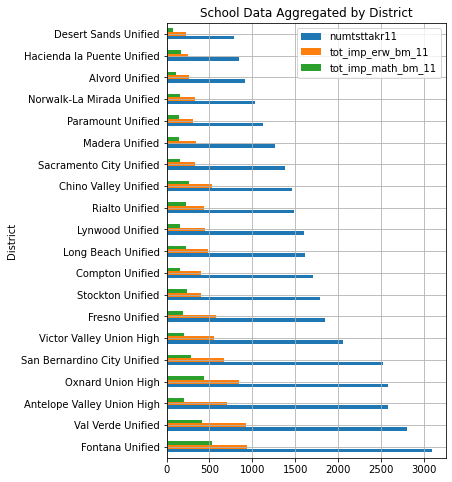

In [14]:
size_comp[1:21].plot.barh(title = 'School Data Aggregated by District',grid=True,
                          figsize=(5,8)).set_ylabel('District')

Text(0, 0.5, 'District')

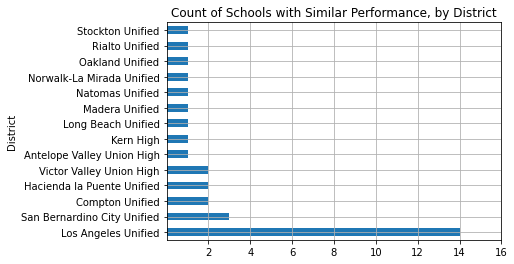

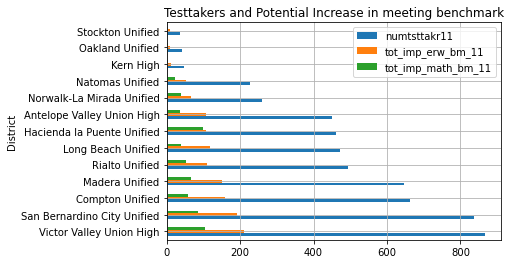

In [15]:
school_sim_perf.value_counts('dname').plot(grid=True,
    kind='barh',title='Count of Schools with Similar Performance, by District',
    xticks=[2, 4, 6, 8, 10, 12, 14, 16]).set_ylabel('District')
dist_perf_filter[1:].plot(grid=True,
    kind='barh', title='Testtakers and Potential Increase in meeting benchmark',
    legend=True).set_ylabel('District')

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

In keeping with current company practice of spreading the company's reach, I recommend adopting the second strategy.
- Target schools of similar performance profile in multiple districts, with the intent of providing service to wider area.
- Focus on maximizing impact, given company resources and staffing. College Spring serves all students, but those that come from low-income backgrounds feel the effects of the program the most.
- Top priority is to replicate success in the public school environment.

## Sources

([*2018-2019 Annual Report*](https://collegespring.org/wp-content/uploads/2019/11/CollegeSpring_Annual_Report_November_2019.pdf))

College Spring ([*Impact*](https://collegespring.org/our-impact/)) Page

bar plot ([*inspiration*](https://stackoverflow.com/questions/48238305/bar-plot-with-groupby))

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!